<a href="https://colab.research.google.com/github/pedrodatascientist/Cienciadedados/blob/master/Corona_virus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando dados sobre o CONVID-19 no **Brasil**


Fonte de dasos:
https://www.kaggle.com/unanimad/corona-virus-brazil

In [2]:
from google.colab import drive
drive.mount('/content/brazil_covid19')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/brazil_covid19


In [3]:
import pandas as pd
import plotly 
import plotly.offline as py
import matplotlib.pyplot as plt
from plotly.offline import plot, iplot
plotly.offline.init_notebook_mode(connected=True)
import seaborn as sns
import plotly.graph_objects as go

In [4]:
dfconvid = pd.read_csv('/content/brazil_covid19/My Drive/brazil_covid19.csv')
dfconvid.head()

,date,hour,state,suspects,refuses,cases,deaths
0,2020-01-30,16:00,Minas Gerais,1,0,0,0
1,2020-01-30,16:00,Rio de Janeiro,1,0,0,0
2,2020-01-30,16:00,Santa Catarina,0,2,0,0
3,2020-01-30,16:00,São Paulo,3,1,0,0
4,2020-01-30,16:00,Rio Grande do Sul,2,2,0,0


In [5]:
dfconvid.rename(columns={'date': 'Data', 'hour': 'Hora','state': 'Estado','suspects': 'Suspeito',
                        'suspects': 'Suspeito', 'refuses': 'Descartado', 'cases': 'Confirmado',
                         'deaths':'Morte'}, inplace=True)
dfconvid.head(1)

,Data,Hora,Estado,Suspeito,Descartado,Confirmado,Morte
0,2020-01-30,16:00,Minas Gerais,1,0,0,0


In [6]:
dfconvid.isnull().sum()

Data          0
Hora          0
Estado        0
Suspeito      0
Descartado    0
Confirmado    0
Morte         0
dtype: int64

In [7]:
dfconvid.dtypes

Data          object
Hora          object
Estado        object
Suspeito       int64
Descartado     int64
Confirmado     int64
Morte          int64
dtype: object

In [0]:
dfconvid['Data'] = pd.to_datetime(dfconvid['Data'])
dfconvid.drop('Hora', inplace=True, axis=1)

In [9]:
dfconvid

,Data,Estado,Suspeito,Descartado,Confirmado,Morte
0,2020-01-30,Minas Gerais,1,0,0,0
1,2020-01-30,Rio de Janeiro,1,0,0,0
2,2020-01-30,Santa Catarina,0,2,0,0
3,2020-01-30,São Paulo,3,1,0,0
4,2020-01-30,Rio Grande do Sul,2,2,0,0
...,...,...,...,...,...,...
679,2020-03-18,Rio Grande do Sul,416,330,19,0
680,2020-03-18,Mato Grosso do Sul,93,26,7,0
681,2020-03-18,Mato Grosso,45,8,0,0
682,2020-03-18,Goiás,353,55,8,0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



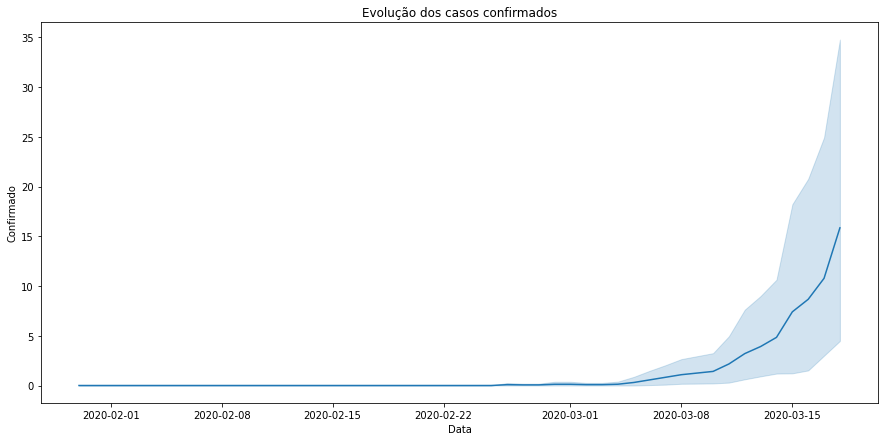

In [10]:
plt.subplots(figsize=(15, 7));
linhas = sns.lineplot(x='Data', y='Confirmado', data=dfconvid);
plt.title('Evolução dos casos confirmados');

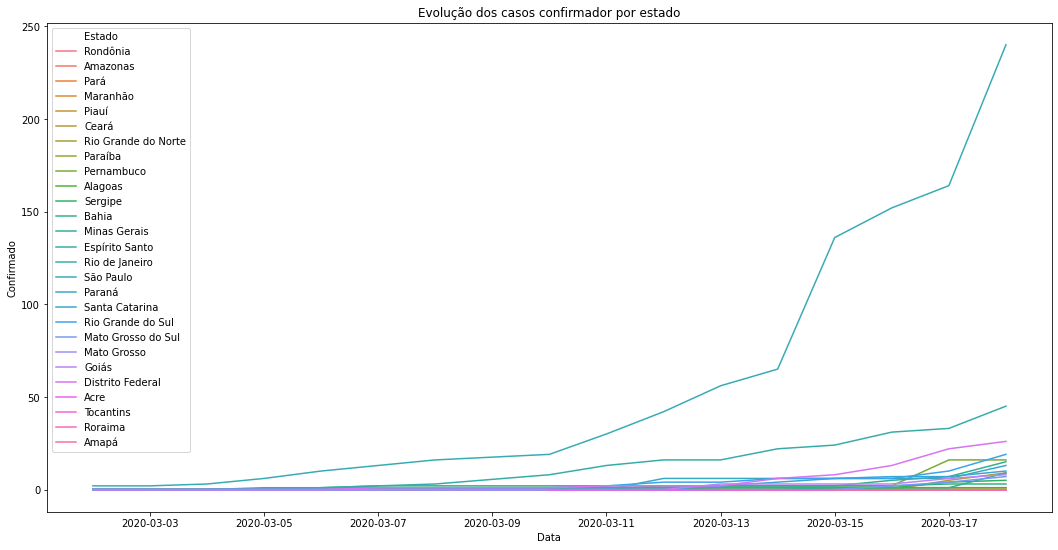

In [15]:
df2 = dfconvid[dfconvid['Data'] > '2020-03-01']
plt.subplots(figsize=(18, 9));
barras = sns.lineplot(x='Data',y='Confirmado', hue="Estado",data=df2);
plt.title('Evolução dos casos confirmador por estado');

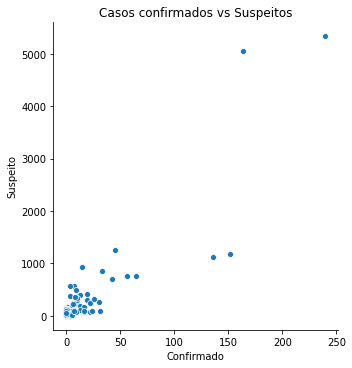

In [16]:
sns.relplot(x='Confirmado', y='Suspeito', data=dfconvid, sizes=10);
plt.title('Casos confirmados vs Suspeitos');

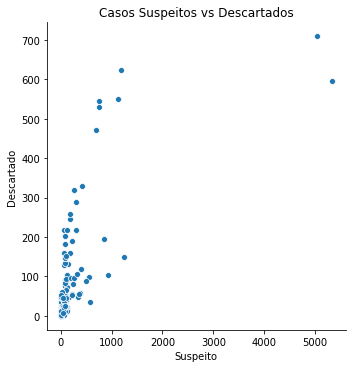

In [17]:
sns.relplot(x='Suspeito', y='Descartado', data=dfconvid, sizes=10);
plt.title('Casos Suspeitos vs Descartados');

In [18]:
estados = dfconvid.groupby('Estado').sum()
ranking = estados.sort_values(by='Confirmado', ascending=False)
ranking.head(10)

,Suspeito,Descartado,Confirmado,Morte
Estado,,,,
São Paulo,17105,6379,963,5
Rio de Janeiro,3395,1815,215,0
Distrito Federal,1337,696,84,0
Rio Grande do Sul,2081,2378,58,0
Paraná,1224,659,49,0
Pernambuco,341,311,42,0
Minas Gerais,2978,730,37,0
Santa Catarina,1479,549,36,0
Goiás,682,457,26,0


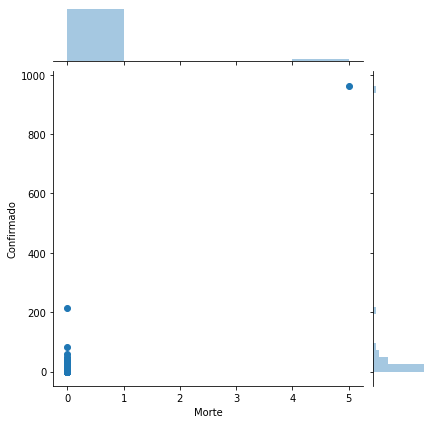

In [19]:
sns.jointplot(x='Morte', y='Confirmado', data=ranking,);